# 3.1. Statistics in Python

In [18]:
import pandas
import urllib
import os
import urllib.request
import numpy as np
import statsmodels.formula.api as smf
import matplotlib
import urllib.request
import os
import matplotlib.pyplot as plt

## 3.1.1. Data representation and interaction

### 3.1.1.1. Data as a table

In [2]:
data = pandas.read_csv('examples/brain_size.csv', sep=';', na_values=".")
# adding na_values=.= will allow the data to be read and analyzed even with missing

In [3]:
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [4]:
t = np.linspace(-6, 6, 20)
#np.linspace creating an array that starts from -6 goes to 6 consisting of 20 numbers, 
#the numbers are equally apart from each other
sin_t = np.sin(t)
#calculates the sine values for the numbers in the array called t
cos_t = np.cos(t)
#calculates the cosine values for the numbers in the array called t

### 3.1.1.2. The pandas data-frame

In [5]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


In [6]:
data.shape
# how many rows are there and how many columns are there

(40, 8)

In [7]:
data.columns
# reports the names of the columns from the data

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [8]:
print(data['Gender'])  
# Columns can be addressed by name   

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [9]:
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()
# for all data that where gender is female what is the mean VIQ

np.float64(109.45)

In [10]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))
    # separate the data based on the Gender category, then from the separated Gender group find the mean value of the VIQ

('Female', np.float64(109.45))
('Male', np.float64(115.25))


In [11]:
groupby_gender.mean()
# from the separated Gender groups find the mean values of each of the values

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


Exercise 1

What is the mean value for VIQ for the full population?

How many males/females were included in this study?

Hint use ‘tab completion’ to find out the methods that can be called, instead of ‘mean’ in the above example.

What is the average value of MRI counts expressed in log units, for males and females?

In [12]:
Mean_VIQ = data["VIQ"].mean()
print(Mean_VIQ)
# finding the overall mean of the VIQ without separating by Gender first 

112.35


In [13]:
gender_counts = data['Gender'].value_counts()
print("Number of males and females:\n", gender_counts)
# for the catagory named Genders how many of each value, Male for Female, are there

Number of males and females:
 Gender
Female    20
Male      20
Name: count, dtype: int64


In [14]:
data['log_MRI'] = np.log(data['MRI_Count'])
# creating a log value of the MRI Counts
log_mri_means = data.groupby('Gender')['log_MRI'].mean()
print("Average log(MRI_Count) by gender:\n", log_mri_means)
# assigning the log values of the MRI counts to each gender

Average log(MRI_Count) by gender:
 Gender
Female    13.665830
Male      13.767731
Name: log_MRI, dtype: float64


array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

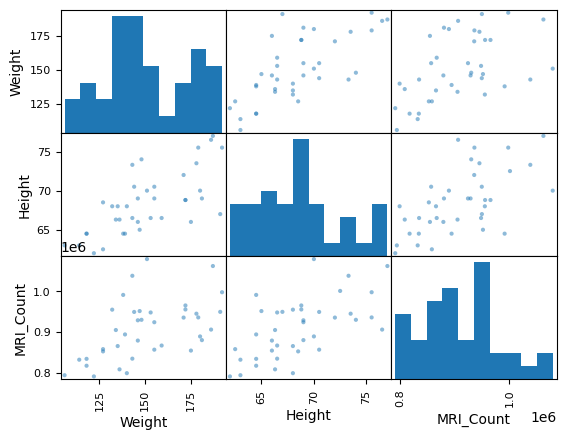

In [15]:
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
# matplotlib was needed to complete from the plot from pandas

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

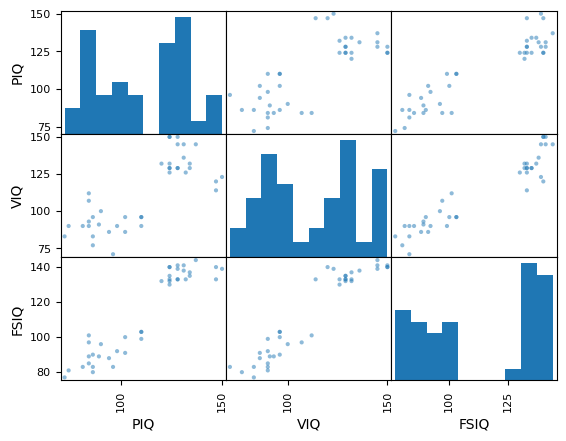

In [16]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

Exercise 2

Plot the scatter matrix for males only, and for females only. Do you think that the 2 sub-populations correspond to gender?

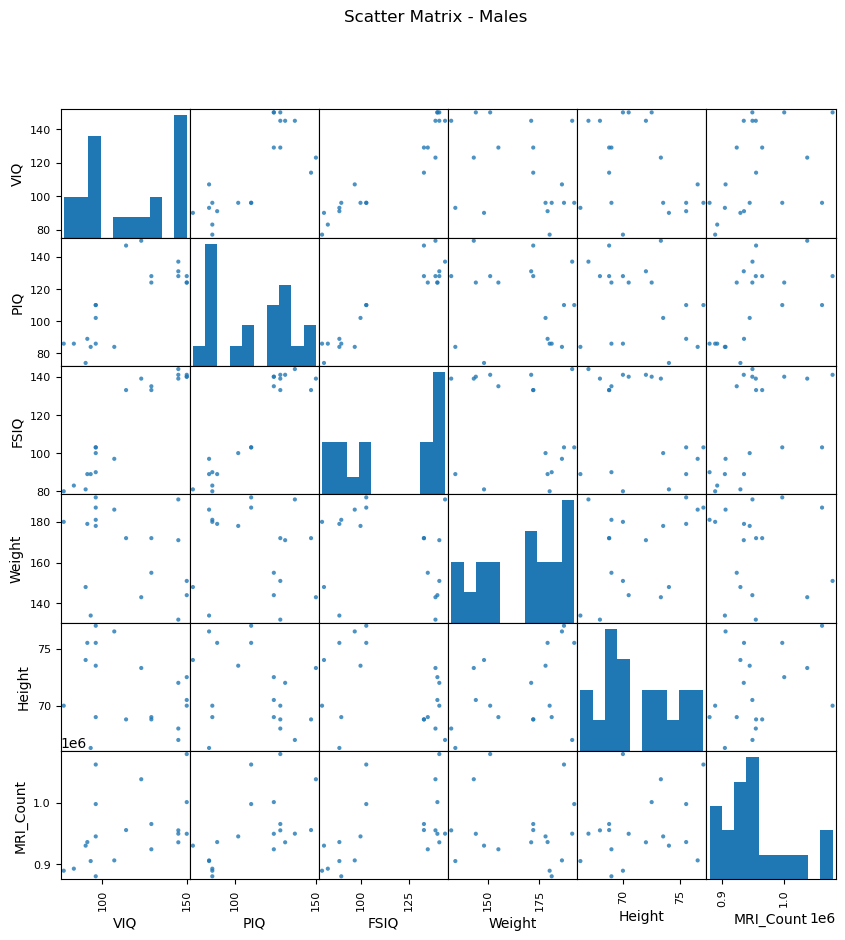

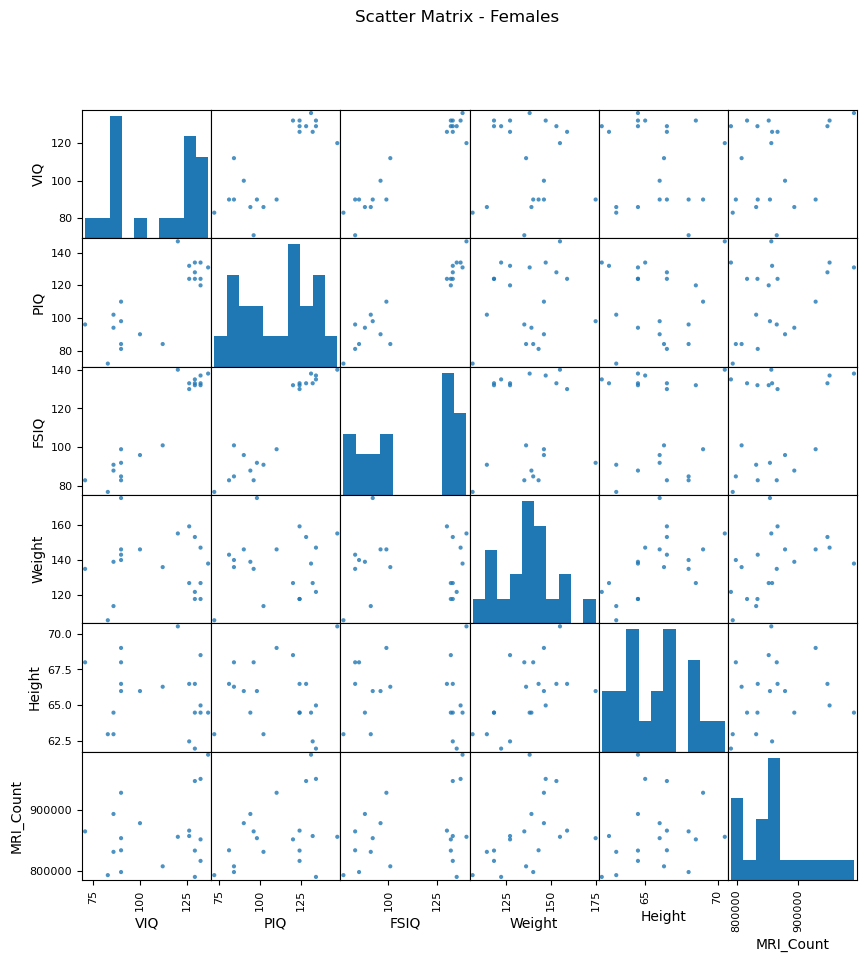

In [19]:
from pandas.plotting import scatter_matrix
males = data[data['Gender'] == 'Male']
females = data[data['Gender'] == 'Female']
# creating variables for the male sets and female sets
scatter_matrix(males[['VIQ', 'PIQ', 'FSIQ', 'Weight', 'Height', 'MRI_Count']], figsize=(10, 10), alpha=0.8)
plt.suptitle('Scatter Matrix - Males')
plt.show()
# restricted to only the values pertaining to the Male defined Gender plot each of the values
scatter_matrix(females[['VIQ', 'PIQ', 'FSIQ', 'Weight', 'Height', 'MRI_Count']], figsize=(10, 10), alpha=0.8)
plt.suptitle('Scatter Matrix - Females')
plt.show()
# restricted to only the values pertaining to the Female defined Gender plot each of the values

## 3.1.2. Hypothesis testing: comparing two groups

### 3.1.2.1. Student’s t-test: the simplest statistical test

In [20]:
from scipy import stats

In [21]:
stats.ttest_1samp(data['VIQ'], 0)
# performing a 1 sample t test on the VIQ data

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

In [22]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)
# performing the same 1 sample t test but now the values for the values of Gender, male or female are separate

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

In [23]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])
# performing an independent 2 sample t test for the FSIQ and PIQ values

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

In [24]:
stats.ttest_rel(data['FSIQ'], data['PIQ']) 
# since the values of FSIQ and PIQ come from the same individual, running a relative test is more appropriate

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

In [25]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0) 
# performing a 1 sample t test where the sample is the difference between FSIQ and PIQ, assuming the difference is 0

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

In [26]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])
# performing a non-parametric test, meaning there is an assumption the data does not follow a certain probability distribution using the FSIQ and PIQ values

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

Exercise 3

Test the difference between weights in males and females.
Use non parametric statistics to test the difference between VIQ in males and females.
Conclusion: we find that the data does not support the hypothesis that males and females have different VIQ.

In [27]:
t_stat, p_val = stats.ttest_ind(males['Weight'].dropna(), females['Weight'].dropna())
print(f"T-test for Weights: t = {t_stat:.3f}, p = {p_val:.3f}")
# separating the data for the Weight values for the values of Gender, Male or Female performing a t test between then and calculating the p value

T-test for Weights: t = 4.871, p = 0.000


In [28]:
u_stat, p_val_viq = stats.mannwhitneyu(males['VIQ'].dropna(), females['VIQ'].dropna(), alternative='two-sided')
print(f"Mann-Whitney U test for VIQ: U = {u_stat:.3f}, p = {p_val_viq:.3f}")
# using a u test to determine if two independent variables, male VIQ and female VIQ,have different distributions

Mann-Whitney U test for VIQ: U = 235.500, p = 0.342


In [29]:
if p_val_viq >= 0.05:
    print("Conclusion: we do NOT reject the null hypothesis — the data does not support a difference in VIQ between males and females.")
else:
    print("Conclusion: we reject the null hypothesis — there is evidence of a VIQ difference between males and females.")

Conclusion: we do NOT reject the null hypothesis — the data does not support a difference in VIQ between males and females.


## 3.1.3. Linear models, multiple factors, and analysis of variance

### 3.1.3.1. “formulas” to specify statistical models in Python

In [30]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

In [31]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()
# create a linear regression model of y predicted from the values of x and fitting it to the data

In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           8.56e-08
Time:                        00:28:56   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

Exercise 4

Retrieve the estimated parameters from the model above. Hint: use tab-completion to find the relevent attribute.

In [33]:
print(model.params)

Intercept   -5.533459
x            2.936888
dtype: float64


In [34]:
data = pandas.read_csv('examples/brain_size.csv', sep=';', na_values=".")

In [35]:
model = ols("VIQ ~ Gender + 1", data).fit()
# again creating a linear regression model with the values of VIQ predicted from gender, the +1 forces the inclusion of the intercept
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 17 Jul 2025   Prob (F-statistic):              0.445
Time:                        00:29:00   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

### 3.1.3.2. Multiple Regression: including multiple factors

In [36]:
data = pandas.read_csv('examples/iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
# another linear regression model predicting sepal width from the name and intercept of petal length
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           1.58e-20
Time:                        00:29:02   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

### 3.1.3.3. Post-hoc hypothesis testing: analysis of variance (ANOVA)

In [37]:
print(model.f_test([0, 1, -1, 0])) 
# the [0, 1, -1, 0] sets the parameters of the analysis

<F test: F=3.245335346574177, p=0.0736905878170114, df_denom=146, df_num=1>


Exercise

Going back to the brain size + IQ data, test if the VIQ of male and female are different after removing the effect of brain size, height and weight.

In [43]:
data = pandas.read_csv('examples/brain_size.csv', sep=';', na_values=".")
model = smf.ols('VIQ ~ Gender + MRI_Count + Height + Weight', data=data).fit()
# predicting the value of VIQ as a linear fucntion of Gender, MRI count, Height and Weight to predict if VIQ is different between teh values of Gender, male and female, without the outside affects of the other values, brain size height and weight
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.733
Date:                Thu, 17 Jul 2025   Prob (F-statistic):             0.0455
Time:                        00:34:59   Log-Likelihood:                -167.03
No. Observations:                  38   AIC:                             344.1
Df Residuals:                      33   BIC:                             352.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        169.7719     90.054      1.

/tmp/slurmtmp.1688705/ipykernel_2894030/130136476.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Height'].fillna(method='pad', inplace=True)
/tmp/slurmtmp.1688705/ipykernel_2894030/130136476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Height'].fillna(method='pad', inplace=True)


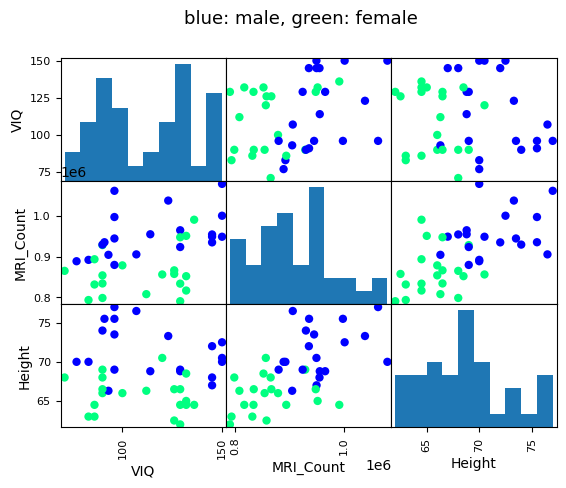

In [44]:
data['Height'].fillna(method='pad', inplace=True)

plotting.scatter_matrix(data[['VIQ', 'MRI_Count', 'Height']],
                        c=(data['Gender'] == 'Female'), marker='o',
                        alpha=1, cmap='winter')

fig = plt.gcf()
fig.suptitle("blue: male, green: female", size=13)

plt.show()

## 3.1.4. More visualization: seaborn for statistical exploration

In [45]:
data = pandas.read_csv('examples/iris.csv')
print(data)  

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


### 3.1.4.1. Pairplot: scatter matrices

In [46]:
if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

In [47]:
# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

/tmp/slurmtmp.1688705/ipykernel_2894030/2038127414.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,


Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

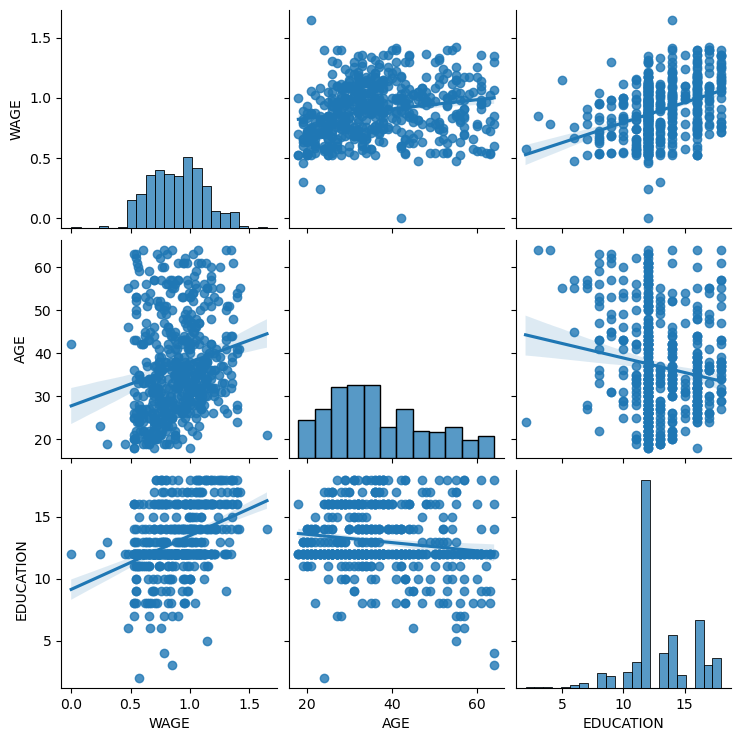

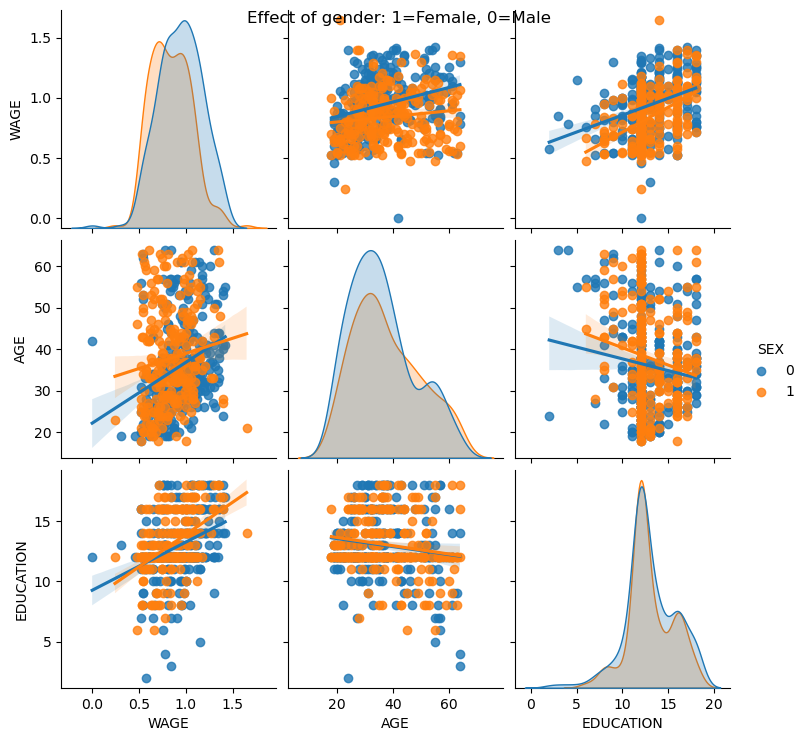

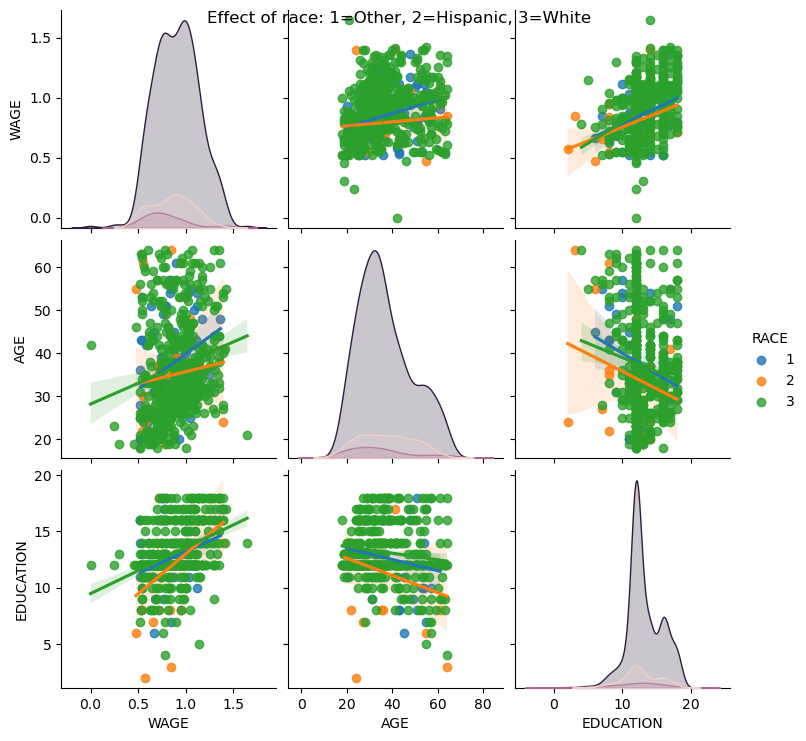

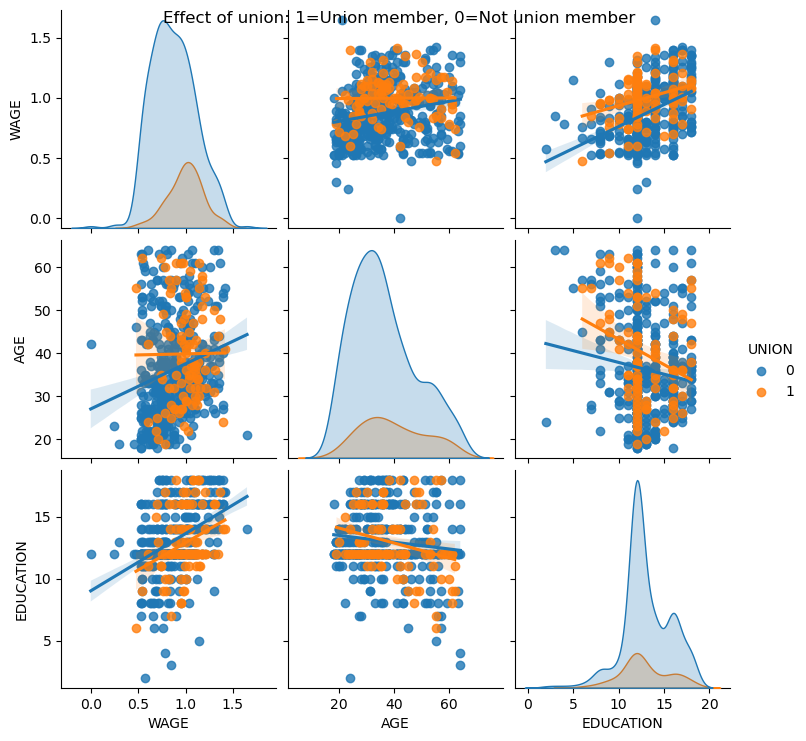

In [48]:
import seaborn
# seaborn is a package to hlep with data visualization
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

### 3.1.4.2. lmplot: plotting a univariate regression

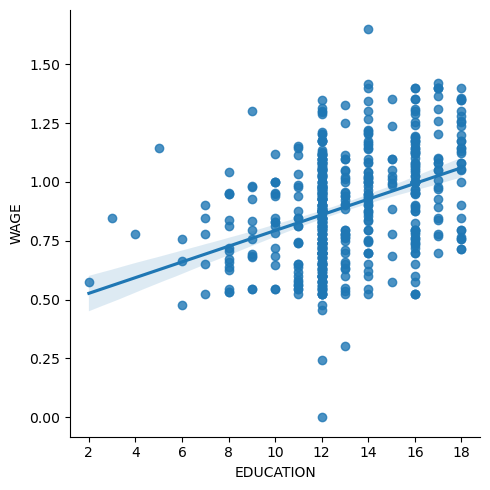

In [49]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

plt.show()

## 3.1.5. Testing for interactions

In [50]:
import statsmodels.formula.api as sm

In [51]:
print(data.columns)

Index(['EDUCATION', 'SOUTH', 'SEX', 'EXPERIENCE', 'UNION', 'WAGE', 'AGE',
       'RACE', 'OCCUPATION', 'SECTOR', 'MARR'],
      dtype='object')


In [52]:
result = sm.ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX',
                data=data).fit()    
# linear regression modeling predicting wage based on education and sex where eduction*sex models the interaction between the two
print(result.summary())  

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           2.94e-25
Time:                        00:35:31   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861